In [1]:
#import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import neattext.functions as nfx
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('realdonaldtrump.csv')
data.columns

Index(['id', 'link', 'content', 'date', 'retweets', 'favorites', 'mentions',
       'hashtags'],
      dtype='object')

In [3]:
df = pd.DataFrame(data['content'])
df.rename(columns={'content':'Tweet'},inplace=True)

In [4]:
pd.set_option('display.max_colwidth',None)

In [5]:
df.head(20)

Tweet
0                 Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1   Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2                  Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!
3                               New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e
4                         "My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump
5                           Miss USA Tara Conner will not be fired - "I've always been a believer in second chances." says Donald Trump
6                    Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl
7                              "Strive for wholeness and keep your sense of wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvm
8                   Enter the "Think Like A Champion" signed book and keychain contest: http://www.trumpthinklikeachampion.com/contest/
9                       "When the achiever achieves, it's not a plateau, it’s a beginning." --Donald J. Trump http://tinyurl.com/pqpfvm
10            "Don’t be afraid of being unique - it's like being afraid of your best self." --Donald J. Trump http://tinyurl.com/pqpfvm
11                        "We win in our lives by having a champion's view of each moment." --Donald J. Trump http://tinyurl.com/pqpfvm
12       "...these days...we could all use a little of the power of Trumpative thinking." –BarnesandNoble.com http://tinyurl.com/pqpfvm
13                          "Always know you could be on the precipice of something great." --Donald J. Trump http://tinyurl.com/pqpfvm
14                     Read a great interview with Donald Trump that appeared in The New York Times Magazine: http://tinyurl.com/qsx4o6
15                                       "Keep it fast, short and direct - whatever it is." --Donald J. Trump http://tinyurl.com/pqpfvm
16   Don't forget to enter the "Think Like A Champion" signed book and keychain contest: http://www.trumpthinklikeachampion.com/contest
17                                  Did you know Donald Trump is on Facebook? http://www.facebook.com/DonaldTrump - Become a fan today!
18                         "Your higher self is in direct opposition to your comfort zone." --Donald J. Trump http://tinyurl.com/pqpfvm
19                                                  Read an excerpt from Think Like A Champion by Donald J. Trump: http://bit.ly/11FHpR

In [6]:
# Clean the text

# Create a function to clean the tweets

def cleantext(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # removes '#' symbols
    text =  re.sub('_',' ', text)# Removes _
    text = re.sub(r'RT[\s]+','',text) # Removes retweets
    text = re.sub(r'https?:\/\/\S+','',text) # Removes hyperlink
    text = re.sub(r'[^\x00-\x7F]+',' ', text) #remove_non_ascii
    text = text.lower()#cvt_lower
    
    
    # removing some unnecessary parts of tweets
    text = re.sub(r' donald j trump','',text)
    text = re.sub(r'realdonaldtrump','',text)
    
    
    
    text = text.lower()#cvt_lower
    text = text.translate(str.maketrans('','',r'''!()-[]{};:'"\,<>./?@$%^&*~'''))#remove_puncs
    
    text = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE).sub(r'',text)# remove emojies
     

    return text

df['Tweet']=df['Tweet'].apply(cleantext)

In [7]:
#show the cleaned text
df.head(20)

Tweet
0                 be sure to tune in and watch donald trump on late night with david letterman as he presents the top ten list tonight
1   donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion
2                                             donald trump reads top ten financial tips on late show with david letterman   very funny
3                                                         new blog post celebrity apprentice finale and lessons learned along the way 
4                              my persona will never be that of a wallflower  i d rather build walls than cling to them donald j trump
5                               miss usa tara conner will not be fired  ive always been a believer in second chances says donald trump
6                                              listen to an interview with donald trump discussing his new book think like a champion 
7                                                            strive for wholeness and keep your sense of wonder intact donald j trump 
8                                                                    enter the think like a champion signed book and keychain contest 
9                                                        when the achiever achieves its not a plateau it s a beginning donald j trump 
10                                            don t be afraid of being unique  its like being afraid of your best self donald j trump 
11                                                       we win in our lives by having a champions view of each moment donald j trump 
12                                         these dayswe could all use a little of the power of trumpative thinking  barnesandnoblecom 
13                                                        always know you could be on the precipice of something great donald j trump 
14                                              read a great interview with donald trump that appeared in the new york times magazine 
15                                                                       keep it fast short and direct  whatever it is donald j trump 
16                                                    dont forget to enter the think like a champion signed book and keychain contest 
17                                                                       did you know donald trump is on facebook   become a fan today
18                                                       your higher self is in direct opposition to your comfort zone donald j trump 
19                                                                       read an excerpt from think like a champion by donald j trump

In [8]:
# Create a funcion to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a funcion to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['polarity'] = df['Tweet'].apply(getPolarity)

In [9]:
df.head()

Tweet  \
0                be sure to tune in and watch donald trump on late night with david letterman as he presents the top ten list tonight   
1  donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion   
2                                            donald trump reads top ten financial tips on late show with david letterman   very funny   
3                                                        new blog post celebrity apprentice finale and lessons learned along the way    
4                             my persona will never be that of a wallflower  i d rather build walls than cling to them donald j trump   

   subjectivity  polarity  
0      0.497222  0.175000  
1      0.454545  0.136364  
2      0.420000  0.105000  
3      0.454545  0.136364  
4      0.000000  0.000000

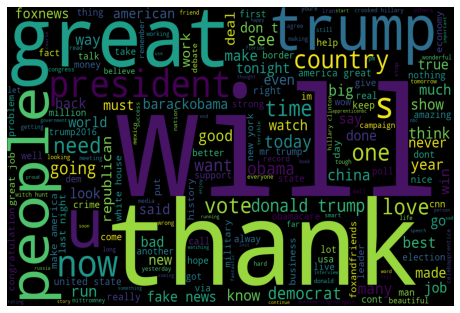

In [10]:
# Plot the Word Cloud
plt.style.use('seaborn')
allWords = ' '.join( [twts for twts in df['Tweet']])
wordcloud = WordCloud(width = 1500 , height = 900 ).generate(allWords)
plt.imshow(wordcloud , interpolation = None, aspect='auto')
plt.axis('off')
plt.show()

In [11]:
# Create a function to compute negative , nutral and positive analysis

def getAnalysis(score):
    if score < -0.5:
        return 'Extremely Negative'
    elif score < 0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score < 0.5:
        return 'Positive'
    else:
        return 'Extremely Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)



In [12]:
df.head(20)

Tweet  \
0                 be sure to tune in and watch donald trump on late night with david letterman as he presents the top ten list tonight   
1   donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion   
2                                             donald trump reads top ten financial tips on late show with david letterman   very funny   
3                                                         new blog post celebrity apprentice finale and lessons learned along the way    
4                              my persona will never be that of a wallflower  i d rather build walls than cling to them donald j trump   
5                               miss usa tara conner will not be fired  ive always been a believer in second chances says donald trump   
6                                              listen to an interview with donald trump discussing his new book think like a champion    
7                                                            strive for wholeness and keep your sense of wonder intact donald j trump    
8                                                                    enter the think like a champion signed book and keychain contest    
9                                                        when the achiever achieves its not a plateau it s a beginning donald j trump    
10                                            don t be afraid of being unique  its like being afraid of your best self donald j trump    
11                                                       we win in our lives by having a champions view of each moment donald j trump    
12                                         these dayswe could all use a little of the power of trumpative thinking  barnesandnoblecom    
13                                                        always know you could be on the precipice of something great donald j trump    
14                                              read a great interview with donald trump that appeared in the new york times magazine    
15                                                                       keep it fast short and direct  whatever it is donald j trump    
16                                                    dont forget to enter the think like a champion signed book and keychain contest    
17                                                                       did you know donald trump is on facebook   become a fan today   
18                                                       your higher self is in direct opposition to your comfort zone donald j trump    
19                                                                       read an excerpt from think like a champion by donald j trump    

    subjectivity  polarity            Analysis  
0       0.497222  0.175000            Positive  
1       0.454545  0.136364            Positive  
2       0.420000  0.105000            Positive  
3       0.454545  0.136364            Positive  
4       0.000000  0.000000             Neutral  
5       0.000000  0.000000             Neutral  
6       0.454545  0.136364            Positive  
7       0.000000  0.000000             Neutral  
8       0.000000  0.000000             Neutral  
9       0.000000  0.000000             Neutral  
10      0.775000  0.043750            Positive  
11      0.400000  0.800000  Extremely Positive  
12      0.500000 -0.187500            Negative  
13      0.750000  0.800000  Extremely Positive  
14      0.602273  0.468182            Positive  
15      0.433333  0.100000            Positive  
16      0.000000  0.000000             Neutral  
17      0.000000  0.000000             Neutral  
18      0.450000  0.175000            Positive  
19      0.000000  0.000000             Neutral

In [13]:
# Print all the extremely positive Tweets
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Extremely Positive'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1

1)we win in our lives by having a champions view of each moment donald j trump 
2)always know you could be on the precipice of something great donald j trump 
3) if you dont have problems youre pretending or you dont run your own business   donald j trump 
4)heres to a safe and happy independence day for one and all  enjoy it donald j trump
5)from donald trump ivanka and jared s wedding was spectacular and they make a beautiful couple i m a very proud father
6)work has begun ahead of schedule to build the greatest golf course in history trump international   scotland
7)wishing you and yours a very happy and bountiful thanksgiving
8)from donald trump wishing everyone a wonderful holiday  a happy healthy prosperous new year let s think like champions in 2010
9)celebrity apprentice returns to nbc sunday 314 911pm etpt outstanding list of celebrities  season should be the best one yet
10)trump tycoon app for iphone  ipod touch  its 299 but the advice is priceless 
11)superbowl sunday is a 

2408) puddlejumper365 you have to have passion for your work thats most important then keep your focus intact good luck
2409) stefthomason great
2410) trumpchicago grand deluxe suites = chicago s most spacious hotel rooms each w 10 ft floor to ceiling windows 
2411) michaelarrante happy birthday
2412) jeffreypham great
2413)nelson mandela and myself had a wonderful relationshiphe was a special man and will be missed 
2414)a good head and a good heart are always a formidable combination  nelson mandela
2415)great going to all of dubai in winning what will be a fantastic  expo2020  we will all be there
2416)  hhshkmohd to all people in the uae your support and enthusiasm fuelled our victory at dubai  expo2020 congratulations a fantastic win
2417)  billbratton was a great choice for nyc police commissioner he will make us proud and safe
2418)steps away from waikikis famous beaches  trumpwaikiki is hawaii s top destination wour signature amenities 
2419)iran has never had a better friend t

4922)  linablue   i love the fact you cant be bought
4923)  linflies  califortrump   we love  trumpforpresident  thankful
4924)i wish good luck to all of the republican candidates that traveled to california to beg for money etc from the koch brothers puppets
4925)  aaa squibby  erictrump  donaldjtrumpjr  ivankatrump and their siblings must be proud of their father  goodluck mr  
4926)  malachinorris   will win every state in 2016 pictwittercomgtqtz7ywtb
4927)     foxandfriends we love u trump
4928)  pizzapartyben   huge supporter out here in alaska lets make this country great again
4929)bush is pretending that the trump surge is great for him and the  nytimesworld is reporting bush delight  con job a bush nightmare
4930)  raleynicole143 i cant wait to be able to tell my kids i voted for    makeamericagreatagain
4931)  dottieandbogey thanks for nice comments over weekend re turnberry you and your husband have fantastic taste also great commentary
4932)  jrprotalker thanks judy for the

7407)a great choice bill is a winner  
7408)looking like very good democrat support for usmca that would be great for our country
7409)on my way to hershey pennsylvania for a rally see everyone soon i love hershey chocolatepictwittercombduybk8krc
7410)thank you pennsylvania with your help your devotion and your drive we are going to keep on working we are going to keep on fighting and we are going to keep on winning we are one movement one people one family and one glorious nation under god jng7x7xgt9mia0ygarkrmlletxz2ffks4xyi0cw1wt=1m2s  
7411)they were just upset that i demanded they pay their fair share for nato their countries are delinquent i raised 530 billion more from nato countries thank you charles  
7412)great deal for usa  
7413)what a great evening  
7414)congratulations to judge lawrence vandyke on being confirmed to the ninth circuit great job
7415)amazing  
7416)the penalty tariffs set for december 15th will not be charged because of the fact that we made the deal we wi

In [14]:
# Print all the positive Tweets
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1
    

1)be sure to tune in and watch donald trump on late night with david letterman as he presents the top ten list tonight
2)donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion
3)donald trump reads top ten financial tips on late show with david letterman   very funny
4)new blog post celebrity apprentice finale and lessons learned along the way 
5)listen to an interview with donald trump discussing his new book think like a champion 
6)don t be afraid of being unique  its like being afraid of your best self donald j trump 
7)read a great interview with donald trump that appeared in the new york times magazine 
8)keep it fast short and direct  whatever it is donald j trump 
9)your higher self is in direct opposition to your comfort zone donald j trump 
10)check out donald trumps new igoogle showcase page 
11)thanks to all for your thoughtful birthday wishes   donald trump
12)re fb vanity urls sf chronicle  david b

2310) tonystang thanks tony good luck
2311)i believe in free markets but allowing a merger of us air  american airlines is totally ridiculous will control most of us market
2312)everyones favorite frontman twisted sister lead singer  deesnider returns to this year s allstar  apprenticenbc dee does great
2313) thanks susan
2314) jdmael watch what happens dummyit wont be pretty
2315)thanks for all the great comments on all my recent interviews much appreciated
2316) michaeljdgregor youre absolutely right
2317)take responsibility for yourselfits a very empowering attitude
2318) jmbruh  jdmael complete is good
2319) rosscooker thanks
2320) ruru 89 thanks
2321) sfyfe n thanks neil
2322) dommarino21 thanks dom
2323) wrousey  marklevinshow thanks will
2324) preppermeister thanks and good luck
2325) brandonarantes thats right hard work it is but worth it
2326) annielonden thanks annie
2327) reed11593 thanks adam
2328) bryanbrager 1 = be passionate if you love what youre doing success will foll

3134)for you newcomers george ross was one of my first advisors on the original apprentice  celebapprentice
3135)george ross and i have done some great real estate deals together he s a tough negotiator  celebapprentice
3136)george also appeared on saturday night live when i was guest host in 2004 a great time  celebapprentice
3137)  shootar401   you need to run for president and get this country back on the right track trump 2016 thank you
3138) jbailey1987 yes we can oh foolish one terrorists should not have the right to remain silent
3139)  doctor trey   i say if obama is so set on universal background checks we run a background check on him very interesting
3140)  fastfranky5    macy  goangelo donald  they are top notch i have a dozen or so  quality thanks people love them
3141)  macgecko  wsquared58    fastfranky5  macy  goangelo actually the first of many trump ties because of look feel quality
3142)   you r the most honest and real person on twitter twitter was invented for trum

5546)  golfswingshirt head pro  la waitersvalet parkersand complete staff and grounds crew all r class actsbetter than pebble bch 
5547)its 435 am and i am working on a very exciting and hopefully very good deal  a major resort the harder i work the luckier i get
5548)  rossdstarkey good luck to everyone playing the  smopen this week watch out for   at doonbeg   thanks
5549)  rtracingstables donald you epitomize what america was and i hope will be again hard work and determination equals success thank you
5550)  bcuban how much money did your dopey brother pay you to say that  hes got no clubbed speed but give him my warmest regards anyway
5551)the blue monster at trump national doral in miami is doing record business  everybody wants a piece of it great reviews thank you
5552)  ddouble j   mr trump what book of yours do you think i should read first my first book the art of the deal
5553)so many people don t understand i am a big proponent of vaccines for children just not in one mass

6133)  nick 0202   the trump would be the only candidate for president better than chris christie in 2016 thank you
6134)  redslightning   country needs the right person for the job theres only one trump 2016 thanks
6135)  steamboatgal8   your my fav for 2016 thanks
6136)  spe mike   i live here in chicago and i love it your building is amazing as is your sign thank you
6137)a testament to american ingenuity  trumptowerny shines over fifth avenue as one of nyc s most iconic buildings
6138)  wrcosentino  trumptowerny was there for the 1st time last week beautiful bldg inside too thanks
6139)business is a creative endeavor cultivate a sense of discovery and start thinking big
6140)the more you know the more you realize how much you dont know how can you possibly discover anything if you already know everything
6141)what can you learn today that you didnt know before set the bar high  do the best you possibly can
6142)amazing people are sending letters of support for  trumpchicago s sign 

8485)  karlrove stated clearly that he wants to repeal the 2nd amendment i thought  foxnews was going to fire that jerk after his romney fiasco
8486) i have loved you since wrestlemania when i was kid i grew up  see what youre all about i am behind you all the way
8487)  bdckool i do believe that trump has the intestinal fortitude to set right all the wrongs of the current administration  trump2016
8488)  isaacnewyorker finally somebody with real intelligence  leadership is runnig for president mr    makeamericagreatagain
8489)  pbstwo    hyannis1952  foxnews the donald owes nothing to lobbyists he could restore our republic true
8490)  lauralynn1955     oreillyfactor loves you it was obvious to me when you were on the day you announced bill o is great
8491) donald trump is the only candidate that is incorruptible and he will get rid off all of the incompetence ruining our country
8492)  jessyandcandy trump you got my vote with your proven resume os success people would be nuts not to 

9132)  howardkurtz  joenbc itd be humorous to cull tweets from experts over past few mos who have predicted trumps immediate collapse
9133)  gse says overwhelming wins by   in primaries will prove what will happen landslide in the general election
9134)just leaving nashville tennessee had a great time with a fabulous crowd of people love nashville  back soonpictwittercomcs8dod8wfm
9135)i will be on  meetthepress with  chucktodd tomorrow morning at 1030am et on  nbc enjoy
9136)tune in to see me on  thisweekabc with  gstephanopoulos at 10am et enjoy
9137)  realreagan0503 its funny how they say   doesnt give specifics but hes the only one who put out more than 2 policies
9138)  scottferson   tarankillam plays a way better fake   than a real  hillaryclinton plays herself  nbcsnl
9139)  mediaite the more the progressives  rinos poke at the donaldtrump the stronger he gets and more real people like him
9140) okay okay   was right laguardia airport is a total dump like really really bad
9141)

11587)phoenix crowd last night was amazing  a packed house i love the great state of arizona not a fan of jeff flake weak on crime  border
11588)last night in phoenix i read the things from my statements on charlottesville that the fake news media didnt cover fairly people got it
11589)as long as we have faith in each other and confidence in our values then there is no challenge too great for us to conquer  alconv2017pictwittercomtsiaghbfm7
11590)enthusiastic dynamic and fun and the american legion  va respectful and strong too bad the dems have no one who can change tones
11591)general john kelly is doing a fantastic job as chief of staff there is tremendous spirit and talent in the wh dont believe the fake news
11592)storm turned hurricane is getting much bigger and more powerful than projected federal government is on site and ready to respond be safe
11593)at the request of the governor of texas i have signed the disaster proclamation which unleashes the full force of government he

12322)  jimrenacci has worked so hard on tax reductions illegal immigration the border and crime i need jim very badly to help our agenda and to keep making america great again he will be a fantastic senator for the great state of ohio and has my full endorsement
12323)today  flotus melania and i were honored to welcome french president  emmanuelmacron and mrs brigitte macron to the  whitehouse we look forward to hosting them at tonights state dinner in their honorpictwittercomwgjcwqszyp
12324)our two great republics are linked together by the timeless bonds of history culture and destiny we are people who cherish our values protect our civilization and recognize the image of god in every human soulpictwittercom01c8isgdb3
12325)congratulations to republican debbie lesko on her big win in the special election for arizona house seat debbie will do a great job press is so silent
12326)looking forward to my meeting with tim cook of apple we will be talking about many things including how t

14690)senator ben sasse has done a wonderful job representing the people of nebraska he is great with our vets the military and your very important second amendment strong on crime and the border ben has my complete and total endorsement
14691)dan bishop was down 17 points 3 weeks ago he then asked me for help we changed his strategy together and he ran a great race big rally last night now it looks like he is going to win  cnn   msnbc are moving their big studio equipment and talent out stay tuned
14692)greg murphy is a big winner in north carolina 03 much bigger margins than originally anticipated congratulations greg
14693)alice  alicetweet stewart thank you for the nice words while on  cnn concerning the two big republican congressional victories you d be great on a network with much higher ratings keep up the good work
14694)greg murphy won big 62 to 37 in north carolina 03  the fake news barely covered the race the win was far bigger than anticipated  there was just nothing the f

15630)dana you are the real dealpictwittercomnagdnp1rdp
15631)tom steyer who other than mini mike bloomberg spent more dollars for nothing than any candidate in history quit the race today proclaiming how thrilled he was to be a part of the the democrat clown show go away tom and save whatever little money you have left
15632)i would find it hard to believe that failed presidential candidates tom steyer or mini mike bloombeg would contribute to the democrat party even against me after the way they have been treated  laughed at  mocked the real politicians ate them up and spit them out
15633)coronavirus in addition to screening travelers  prior to boarding  from certain designated high risk countries or areas within those countries they will also be screened when they arrive in america thank you  vp  secazar  cdcgov  cdcdirector
15634)the food is great at sammy s mexican grill in phoenix arizona congratulations to betty  jorge rivas on doing such a wonderful job i will try hard to stop 

In [15]:
# Print all the neutral Tweets
j=1
sortedDF = df.sort_values(by=['polarity'],ascending = False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Neutral'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1

1)my persona will never be that of a wallflower  i d rather build walls than cling to them donald j trump
2)miss usa tara conner will not be fired  ive always been a believer in second chances says donald trump
3)strive for wholeness and keep your sense of wonder intact donald j trump 
4)enter the think like a champion signed book and keychain contest 
5)when the achiever achieves its not a plateau it s a beginning donald j trump 
6)dont forget to enter the think like a champion signed book and keychain contest 
7)did you know donald trump is on facebook   become a fan today
8)read an excerpt from think like a champion by donald j trump 
9)you have to know when to call it quits and when to keep moving forward donald j trump 
10)last week to enter the think like a champion signed book and keychain contest 
11)today is donald trumps birthday send him your bday wishes here 
12) expand your life every day   donald j trump 
13)donald trump backs apprentice randal pinkett for nj lieutenant g

1391) rcthompson01  cher i agree
1392)join my kids   elvisduran  lisalampanelli  stephenbaldwin7  latoyajackson  henribendel tonite to raise money for  stjude between 79pm
1393) i agree
1394)donald trumps guns by  emilymiller  washtimes
1395)dont assume you have to accept the hand you were dealt   think like a billionaire
1396)with our record debt  trillion  deficits our  is now at an alltime low against the chinese yuan time for our govt to work together
1397) jenke2501 i understand your message
1398) dxerebl they must actually like me
1399)president obama we need to protect our closest ally israel the situation in the middle east is at a tipping point
1400)a house divided against itself cannot stand abraham lincoln
1401)fiscal cliff negotiations have officially begun between the president and congresswashington must come together and make a deal
1402)now china is trying to take over a us airbase  this is only the beginning they only understand toughness
1403)it is that time of the ye

2242)  cjrj49   please dont forget us people on the west coast  nospoiling i wontthanks
2243)  latoyajackson   omarosa are not likely to become friends  ever  celebapprentice
2244)  stephenbaldwin7 thinks  therealmarilu is pingponging all over the place do you agree  celebapprentice
2245)  omarosa admitting she s a threat in the boardroom that s not revelation knowledge  celebapprentice
2246)they should have got darrell hammond as the donald trump impersonator  celebapprentice
2247)  joan rivers  i know you re watching what did you think of your impersonator
2248)let s see what happens in the boardroom   celebapprentice
2249)who are your favorites on team power team plan b  celebapprentice
2250)people ask about  amandatmiller she is actually a vp of marketing at the trump organization  celebapprentice
2251)that s adrian in the elevator  he works at  trumptowerny  he s got a lot of stories  celebapprentice
2252)adrian also gives autographs if you stop by the lobby of  trumptowerny  cele

3077) trumpvine where is the money  macmiller 
3078) show5783 who knows
3079) dannydamico67    may not agree with your political stance but your golf courses are unreal thx i think
3080)  gop house leadership   establish select committee on benghazi there is a massive coverup
3081)my  media int with  stevemtalk on my iowa  thefamilyleader speech  jonkarl 2016  benghazi
3082)  alexsalmond see photo 
3083)my interview with  thisweekabc w  gstephanopoulos destroyed all sunday competition w 252m total viewers that s why they want me on
3084)nielsen ratings 1  thisweekabc 252 viewers 6 shr191rtg 55 2554 2  meetthepress 224 total viewers 5 shr161rtg 47 2554
3085)  zionslion777   it would be an honor to our nation if you would be our president thank you for your confidence
3086)  mmanoff   what can i do to help donald j trump get elected to be president of the usa just sit tightthanks
3087) its called   for president   fortunemagazine theres only one way out of this tepid economy
3088)   we n

4310)  rossbrotherton   you have to run for president in 2016 and save this country  please  savethiscountry
4311)  alaina danielle   run for president mr trump please  savethiscountry
4312)along with a soaring bar of skybound gold  trumplasvegas  pool deck overlooks the city of lights   
4313)  drdannydegraff   alaina danielle   run for president mr trump please  savethiscountry
4314)  ohhellocelo   when you take charge mr trump thats when its gonna change  trumpforpresident 
4315)  trumpscotland provides luxury accommodations  a championship par 72 7400 yd course book your tee time now 
4316)  realtracymyers big congrats to   on your dc hotel ground breaking thank you
4317)watched gennady golovkin  gggboxing at msg on saturday night he was fantasticshould fight  floydmayweather
4318)opening in 2016 trump hotel rio de janeiro will be a 13story 171guestroom masterpiece with a beachside view   utma=17136135071406042263140604226314065594782  utmb=12101406559478  utmc=1  utmx=  utmz=11406

5019)  dietztaa 9 if donald trump ran for president hed have my vote based on his twitter account alone
5020)looking forward to speaking at prestigious  theeconomicclub on december 15th 
5021) tbt with james lipton on the set of  apprenticenbc 
5022)i never gave anybody hell i just told the truth and they thought it was hell  harry s truman
5023)entrepreneurs believe in yourself if you dont no one else will either
5024)  adidasfevernova   hey donald  where can i purchase a  trump2016 campaign shirt any details soon
5025) r 2014 i will step over them to buy a   tie
5026)  mmayer87  brandiglanville    apprenticenbc i cant wait to watch the show january 4th
5027)  steff17brown my biggest hero will forever be    trump2016 thank you
5028)  licant wait to meet donaldtrump will deliver keynote  icsc ny national deal making conference on dec 8   nyconf
5029)  a roy0317 the celebrity apprentice is back january 4th and i cant wait to see   pick people apart in the boardroom
5030)  fasttracktalen

6149)the republicans are funding obamacare and amnesty obama beats them 
6150)isis is operating a training camp 8 miles outside our southern border    we need a wall deduct costs from mexico
6151)via  amspec by  exclusive trump says obama shows  total desperation  on iran   
6152)  cnbc 5 family values donald trump used to build his empire    pictwittercoma4dx8ng1ji
6153)  lmp999   george  will you retire  please
6154)  antonio annesi   run for president please  trump2016
6155)   one word to describe  jordanspieth donald quality
6156)  freedomspatriot  p4tr10tboo  souperfan2012  souperfan2013  wolfman708  dryheat115 mr   made  impression
6157)  ltodd14   when are you announcing
6158)  magicman121   mrtrump are u going to run for 2016 presidency i hope so
6159)  susanhoffman24   obviously  weneedyou  trump2016
6160)  landotalley50   answer the calljust do itamerica needs yourun stay tuned
6161)  seddhmb   i believe you have been called to take us to another level of prosperity and bring

7341)  tdavistonya  brucedhendrix  poetry4bitcoin nope trump isnt taking 2 weeks off to promote his book trump is donating all to charity
7342)  kingster73   rubio is irresponsible on finances and doesnt show up for work who would hire him not the american people
7343)  dianehauschildt  foxnews  freelancer1787    realbencarson  
7344)  timenout   book in hand waiting for the next president pictwittercom83tjmzuuia
7345)  lookercherry   the polls are for the news cycle trump is miles ahead and leaving all others in the dust dont doubt me
7346)marco rubio would keep barack obama s executive order on amnesty intact see article cannot be president  
7347)  ethansimmons111  danscavino   pictwittercomd9qlsddcry
7348)  misstozak    seanhannity  oann this says it all trump 2016   
7349)  mr holtzworth   sarah palin defends donald trumps immigration plan on fox news  via  youtube
7350)  nbcsnl shooting promos for  trumponsnl with cecily and   pictwittercomk1jkoghrhy
7351)  judgemoroz republicans

8125)thank you pennsylvania  trump2016pictwittercommucxspuhnv   bei trump tower
8126)thank you connecticut  trump2016pictwittercom3ggovxszsf   bei trump tower
8127)thank you rhode island  trump2016pictwittercomezcvm7yc0y   bei trump tower
8128)thank you delaware  trump2016pictwittercomfexthmuwuo
8129)thank you newt  
8130)agreedpictwittercombiyldp3ciw
8131)thank you connecticut delaware maryland pennsylvania and rhode island  makeamericagreatagainpictwittercommgkh77wqt8
8132)thank you for the endorsement coach bobby knight i will never forget it   pictwittercommprtrwv51u
8133)thank you laura  
8134)heading to rally with bobby now see you soonpictwittercomdwssoectzn
8135)thank you evansville indiana  makeamericagreatagainpictwittercomfn8clnjutr
8136) makeamericagreatagainpictwittercom53qhbks7ya
8137) makeamericagreatagain  trump2016pictwittercomzhm5w7jnss
8138)thank you costa mesa california 31000 people tonight with thousands turned away i will be back  trump2016pictwittercom4p0tzvzn0e

9145)i will be having lunch at the white house today with republican senators concerning healthcare they must keep their promise to america
9146)melania and i send our thoughts and prayers to senator mccain cindy and their entire family get well soon   
9147) madeinamerica  pictwittercomvfirc5xssx
9148)six months in  it is the hope of growththat is making americafour trillion dollarsricher stuart  varneyco  pictwittercomx9meuzdom6
9149)manufacturers  recordhigh optimism reported in the 1st qtr has carried into the 2nd qtr of 2017 via  shopfloornam  pictwittercomwhztcaxhrq
9150)this morning i will be going to the commissioning ceremony for the largest aircraft carrier in the world the gerald r ford norfolk va
9151)what about all of the clinton ties to russia including podesta company uranium deal russian reset big dollar speeches etc
9152)my son donald openly gave his emails to the media  authorities whereas crooked hillary clinton deleted  acid washed her 33000 emails
9153)in all fairn

10100)people have been saying for years that we should talk to mexico the problem is that mexico is an  abuser  of the united states taking but never giving it has been this way for decades either they stop the invasion of our country by drug dealers cartels human traffickers
10101)thank you   
10102) usstatevisitpictwittercom8en2bvtllu
10103)  
10104)thank you  theresa may  
10105) usstatevisitpictwittercomxka0ijrqyo
10106)immigration discussions at the white house with representatives of mexico have ended for the day progress is being made but not nearly enough border arrests for may are at 133000 because of mexico  the democrats in congress refusing to budge on immigration reform further
10107) dday75thanniversary  dday75pictwittercombwfvet7gtg
10108)heading over to normandy to celebrate some of the bravest that ever lived we are eternally grateful  dday75thanniversary  dday75pictwittercomrg15c32gow
10109) dday75thanniversary  
10110) dday75thanniversarypictwittercomgisolml4np
10111

10849)pictwittercom5oa0iu92vi
10850)thank you franklin  
10851)  pictwittercom5itkl6q9oq
10852)pictwittercomh5bakuoyv2
10853)pictwittercomrj4yo4htsy
10854)pictwittercomryvvzb6egt
10855)melania and i send our warmest wishes to jewish people in the united states israel and across the world as you commence the 8day celebration of hanukkah  
10856)nancy pelosi who has already lost the house  speakership once  is about to lose it again is doing everything she can to delay the zero republican vote articles of impeachment she is trying to take over the senate  cryin  chuck is trying to take over the trial no way
10857)i agree 100  
10858) stocks kick off christmas week at alltime record highs   foxandfriends
10859) the trump administration trump policies have put our economy on a trajectory it has never been on before  griff jenkins  foxandfriends
10860)pictwittercomkqx5wrin3x
10861)pictwittercomjssy9yvh2p
10862)merry christmas
10863)2019 holiday retail sales were up 34 from last year the big

In [16]:
# Print all the negative Tweets
j=1
sortedDF = df.sort_values(by=['polarity'],ascending = False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1
    

1)these dayswe could all use a little of the power of trumpative thinking  barnesandnoblecom 
2)donald trump s commercialfree wwe raw does big rating 
3)be aware of things that seem inexplicable because they can be a big step towards innovation donald j trump 
4) watch donald trumps recent appearance on the late show with david letterman 
5) more hysterical dsrl videos featuring donald trump and double trump plus enter golden lick race sweepstakes 
6)ill be turning the table on larry king this saturday night ill be interviewing him in honor of the 25th anniversary of his show
7)ill be discussing a variety of topics tonight with greta van susteren 10 pm on fox news it will be the first of a two part series
8)watch cnn tomorrow at 2 pm  5 pm and on friday at 7 pm  11 pm for a thanksgiving special hosted by john king ill be a featured guest
9)tomorrow nights episode of the apprentice delivers excitement at qvc along with appearances by isaac mizrahi and cathie black 10 pm on nbc
10)ill be

1241)the time magazine list of the 100 most influential people is a joke and stunt of a magazine that will like newsweeksoon be dead bad list
1242)   seriously wonder if you like chinese people not talking about its gov i really like the chinese people
1243)marble mouth  tombrokaw asks why do we think to have a successful eveving you have to have donald trump as your guest of honor boring tom
1244)the white house correspondents dinner was so boring this year i guess that s because i didn t attendeven 
1245) failed show  dannyzuker  i have never heard of you and was told you are a loserafter reading your credits i have no questions about it
1246)failed show  dannyzuker season 1 of  apprenticenbc had 28 million viewers and 415 million watching
1247)  dannyzuker im in front of the camera and behind the camera just looked at your picture youll never be in front of the camera
1248)i just sent  thegarybusey a check of 20000 for his charity childrens kawasaki disease  he worked hard and deser

1794)  austin fall monetarily in 2016 we will be in such terrible shape that having   as potus would be a great idea for us
1795)  bicyea50    danamira  nymag whats the odds the 5 people who subscribe 2 that rag i mean mag will ever see this tweet
1796)why doesnt president obama just get the people from google to fix the failed website in fact why didnt he use them in the first place
1797)trump int l hotel  tower chicago is one of very few hotels in no america w a 5 star 5 diamond hotel  a 5 star 5 diamond restaurant
1798)where s the global warming 2013 was one of the least extreme years in weather on record
1799)have time to waste go to the obamacare website
1800)honestly whether youre for or against obamacare the 635 million dollar website fiasco is bad for the us it makes us look totally inept
1801)   seriously you are the only american qualified to be prez all areas of competence thank you
1802)  sundayhorse    thegurleygirl sad donald trump isnt president we would not be in this m

2392)usmc sgt tahmooressi has now been held in mexican jail for over 150 days when will obama call for his release  freeourmarine
2393)  p01yn0nym0u55   vikdam  jamandatrtl imagine how mad youd be to watch your healthy child crash hard after vaccine then doctors mock you
2394)im not saying to not give vaccines i am just saying give them small doses over a long period of time  not one massive dose for a child
2395)  billywmerritt the art of the deal got me off my ass and got me in the game we all have 24 hours in a day no excuses for me thanks
2396)   hard not think atlantic city and not think of youyoure an icon there and always will be god bless you
2397)  mrswilbert    foxandfriends now that i know youre on every monday ill definitely be listening
2398)new poll states that a record number of americans have lost all faith in president obama  duh
2399)  thebigjamesg what kind of president doesnt get playing golf after a cruel beheading isnt the thing to do detached from reality he is
2

3293)i am having a really hard time watching  foxnews
3294)  ellenespence  marklevinshow thank you for maintaining your integrity during this disgusting lynching of   thanks mark
3295)  joeoh89  seanhannity   what happened to the pledge walker quits and slams trump losers proving pledge was sham
3296)  themindwave  foxnews im not sure why u r giving them this much importance they had wanted to take u down in debate and they failed
3297)  glendabelle 11  foxnews fox has become a supporter of liberalsthey are not supporting the gop candidatesespecially trump quit watching
3298)  ignatiusgreilly  charlescwcooke    foxnews will you cry when marco amnesty loses nomination
3299)  megynkelly still cannot figure out this massive base of support for trump is because he is anti politician  trump2016
3300)headline reads rubio passes bush in florida poll  unfair because trump destroys them both trump 315 rubio 192 bush 113
3301)  foxnews has been treating me very unfairly  i have therefore decided

4166)  diamondandsilk crooked hillary getting desperate on tv bashing trump  cnn she forgot how she said a kkk member was her mentor
4167)  blackmenforbernie leader  hillary2016  no regard for black race     via  dailycaller  blacksfortrump
4168)dwyane wades cousin was just shot and killed walking her baby in chicago just what i have been saying africanamericans will vote trump
4169)does anyone know that crooked hillary who tried so hard was unable to pass the bar exams in washington dc she was forced to go elsewhere
4170)crooked hillarys brainpower is highly overratedprobably why her decision making is so bad or as stated by bernie s she has bad judgement
4171)just heard that crazy and very dumb  morningmika had a mental breakdown while talking about me on the low ratings  morning joe joe a mess
4172)i am returning to the pensacola bay center in florida friday 9916 at 7pm join me   pictwittercomwaeplfs0jl
4173)  cnn is so disgusting in their bias but they are having a hard time promot

4792)no american should be separated from their loved ones because of preventable crime committed by those illegally in our country our cities should be sanctuaries for americans   not for criminal alienspictwittercomcvtkcg1pln
4793)very little discussion of all the purposely false and defamatory stories put out this week by the fake news media they are out of control  correct reporting means nothing to them major lies written then forced to be withdrawn after they are exposeda stain on america
4794)despite thousands of hours wasted and many millions of dollars spent the democrats have been unable to show any collusion with russia  so now they are moving on to the false accusations and fabricated stories of women who i don t know andor have never met fake news
4795)the people of alabama will do the right thing doug jones is proabortion weak on crime military and illegal immigration bad for gun owners and veterans and against the wall jones is a pelosischumer puppet roy moore will alway

5791)zero is getting done with the democrats in charge of the house all they want to do is put the mueller report behind them and start all over again no doovers
5792)rex tillerson a man who is  dumb as a rock  and totally ill prepared and ill equipped to be secretary of state made up a story he got fired that i was outprepared by vladimir putin at a meeting in hamburg germany i don t think putin would agree look how the us is doing
5793)i was extremely calm yesterday with my meeting with pelosi and schumer knowing that they would say i was raging which they always do along with their partner the fake news media well so many stories about the meeting use the rage narrative anyway  fake  corrupt press
5794)when the democrats in congress refinish for the 5th time their fake work on their very disappointing mueller report finding they will have the time to get the real work of the people done move quickly
5795) foxnews poll a majority of americans want the democrats to stop investigating 

6791) fcc this is a disgrace even worse than  nbc usually is which is really bad sleepy eyes must be fired  
6792)obamagate makes watergate look small time
6793)the enemy of the people sadly our lamestream media is totally corrupt  
6794)then we must be very careful crazy nancy would be a total disaster and the usa will never be a communist country  
6795)fake journalists  
6796)sleepy eyes fails again  
6797)obamagate makes watergate look small time  
6798)ratings way down show sucks  
6799)when will they open a cold case on the psycho joe scarborough matter in florida did he get away with murder some people think so why did he leave congress so quietly and quickly isn t it obvious what s happening now a total nut job
6800)asian americans are very angry at what china has done to our country and the world chinese americans are the most angry of all i don t blame them
6801)as long as other countries are receiving the benefits of negative rates the usa should also accept the  gift  big n

In [17]:
# Print all the extremely negative Tweets
j=1
sortedDF = df.sort_values(by=['polarity'],ascending = False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Extremely Negative'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        j+=1

1)i am honored to be chosen by gray line for their ny ride of fame campaign today we had the ribbon cutting ceremony in front of trump tower
2) message for house gop the worst thing you can possibly do in a deal is seem desperate to make it  the art of the deal
3)my interview from yesterday on fox and friends  gop crazy if they dont get everything they want 
4) the worst thing you can possibly do in a deal is seem desperate to make it the art of the deal
5)obama care is already having a devastating impact on our economy
6)insurgents in iraq show they can still mount horrifying attacksus wastes trillions
7)really bad ratings for lawrence odonnell on msnbcoreilly is killing him
8)the unemployment numbers are tragic we are letting the world take our jobs it has to stop
9)bob beckel a commentator for fox is bad for the  foxnews brand  bobbeckel is close to incompetent
10)why is  barackobama letting the taliban know when our troops are leaving  this is dangerous for our soldiers
11)the oil 

412)  carmelcandi68 the isis thug who murdered amer james foley may hv been gitmo detainee    yall want close gitmo so bad
413)  lindseyscheibe   eriks story breaks my heart vaccines destroyed his family   very sad
414)  jamandatrtl her son was overvaccinated  cdcwhistleblower  hearthiswell   terrible
415)icymi via  foxnewsinsider my  foxandfriends from yesterday on obama s dangerous disconnect   
416)secretary kerry cannot get other nations to join us in fighting isis they are afraid and he is a poor salesman who reps a pathetic leader
417)  newmexicoroni   sadly they of course will blame you for the failure idiots and i havent been there in years
418)briarcliff manor mayor vescio is doing a terrible job taxes way too high roads in terrible condition repave pine road  briarcliffmanor
419)zegarelli and vescio pine road looks like hell must be repaved now very bad for town  briarcliffmanor
420)can you believe we still have not gotten our marine out of mexico he sits in prison while our 

615)the failing  nytimes is truly one of the worst newspapers they knowingly write lies and never even call to fact check really bad people
616)senator  lindseygrahamsc made horrible statements about  sentedcruz   and then he endorsed him no wonder nobody trusts politicians
617)my heart  prayers go out to all of the victims of the terrible  brussels tragedy this madness must be stopped and i will stop it
618)  davidgregory got thrown off of tv by nbc fired like a dog now he is on  cnn being nasty to me not nice
619)  vivhall3   here your delegate replaced at co gop convention    very sad
620)hillary has bad judgment 
621)how quality a woman is rowanne brewer lane to have exposed the  nytimes as a disgusting fraud thank you rowanne
622)we just had the worst jobs report since 2010
623)hillary clinton is unfit to be president she has bad judgement poor leadership skills and a very bad and destructive track record change
624)thoughts and prayers are with everyone in west virginia dealing w

751)fbi  doj to review the outrageous jussie smollett case in chicago it is an embarrassment to our nation
752)  byronyork  how bad does border have to be for democrats to admit its an emergency   
753)a 9th circuit judge just ruled that mexico is too dangerous for migrants so unfair to the us out of control  
754)when i won the election in 2016 the  nytimes had to beg their fleeing subscribers for forgiveness in that they covered the election and me so badly they didn t have a clue it was pathetic they even apologized to me but now they are even worse really corrupt reporting
755)before nancy who has lost all control of congress and is getting nothing done decides to defend her leader rep omar she should look at the antisemitic antiisrael and ungrateful us hate statements omar has made she is out of control except for her control of nancy
756) the democrats have nothing just want to distract from this president the fbi was not doing its job the state department was covering things up 

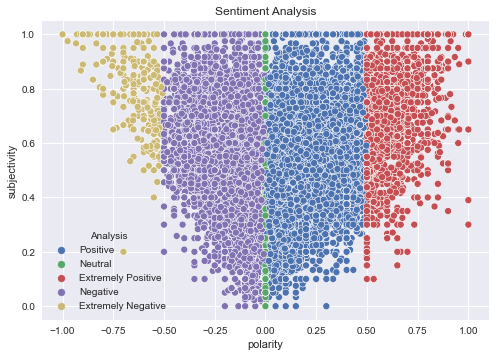

In [18]:
# Plot polarity and Subjectivity

sns.scatterplot(data=df , x='polarity', y='subjectivity',hue='Analysis')
plt.title('Sentiment Analysis')
plt.show()

In [19]:
# Get percentage of extremely positive tweets
eptwts = df[df['Analysis']=='Extremely Positive']
eptwts = eptwts['Tweet']
ep = round((eptwts.shape[0] / df.shape[0])*100,2)
print(str(ep) + ' %')

17.91 %


In [20]:
# Get percentage of positive tweets
ptwts = df[df['Analysis']=='Positive']
ptwts = ptwts['Tweet']
p=round((ptwts.shape[0] / df.shape[0])*100,2)
print(str(p) + ' %')

37.55 %


In [21]:
# Get percentage of nutral tweets
nutwts = df[df['Analysis']=='Neutral']
nutwts = nutwts['Tweet']
nu = round((nutwts.shape[0] / df.shape[0])*100,2)
print(str(nu) + ' %')

26.61 %


In [22]:
# Get percentage of negative tweets
ntwts = df[df['Analysis']=='Negative']
ntwts = ntwts['Tweet']
n = round((ntwts.shape[0] / df.shape[0])*100,2)
print(str(n) + ' %')

15.98 %


In [23]:
# Get percentage of extremely negative tweets
entwts = df[df['Analysis']=='Extremely Negative']
entwts = entwts['Tweet']
en = round((entwts.shape[0] / df.shape[0])*100,2)
print(str(en) + ' %')

1.94 %


Positive              16280
Neutral               11538
Extremely Positive     7766
Negative               6929
Extremely Negative      839
Name: Analysis, dtype: int64


C:\Users\Arpan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Analysis', ylabel='count'>

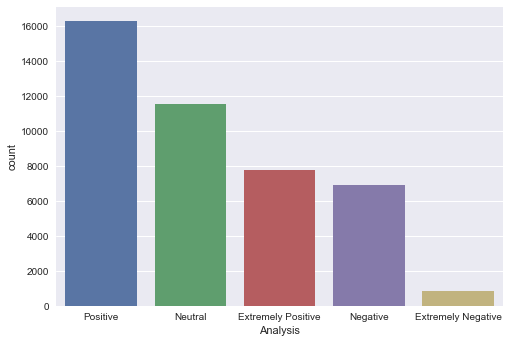

In [24]:
# Show the value counts
vals = df['Analysis'].value_counts()
print(vals)

# Plot and Visualize the counts
sns.countplot(df['Analysis'])

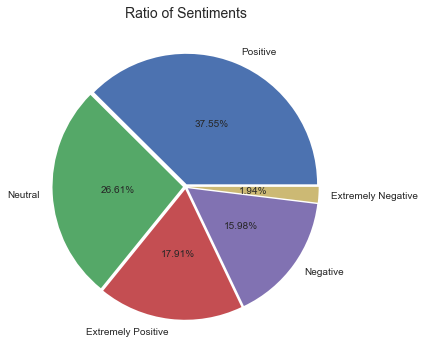

In [25]:
pie, ax = plt.subplots(figsize=[10,6])
labels = vals.keys()
explode=(0, 0.1, 0, 0,0)
plt.pie(x=vals, autopct="%.2f%%", explode=[0.02]*5, labels=labels, pctdistance=0.5)
plt.title("Ratio of Sentiments", fontsize=14);



In [26]:
# removing stop words
eptwts = eptwts.apply(nfx.remove_stopwords).tolist()
ptwts = ptwts.apply(nfx.remove_stopwords).tolist()
nutwts = nutwts.apply(nfx.remove_stopwords).tolist()
ntwts = ntwts.apply(nfx.remove_stopwords).tolist()
entwts = entwts.apply(nfx.remove_stopwords).tolist()

In [27]:
# tokenizing the words for counting
ep_tokens = [token for line in eptwts for token in line.split()]
p_tokens = [token for line in ptwts for token in line.split()]
nu_tokens = [token for line in nutwts for token in line.split()]
n_tokens = [token for line in ntwts for token in line.split()]
en_tokens = [token for line in entwts for token in line.split()]


In [28]:
from collections import Counter

In [29]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [30]:
get_tokens(en_tokens)

{'bad': 165,
 'terrible': 114,
 'worst': 78,
 'obama': 78,
 'trump': 71,
 'people': 59,
 'stupid': 56,
 'president': 53,
 'country': 49,
 'hate': 45,
 'deal': 41,
 'badly': 38,
 'crazy': 37,
 'want': 36,
 'horrible': 36,
 'pathetic': 36,
 'democrats': 34,
 'sad': 28,
 'hillary': 28,
 'going': 27,
 'donald': 27,
 'run': 26,
 'like': 26,
 'dont': 25,
 'boring': 25,
 'said': 25,
 'desperate': 23,
 'job': 23,
 'cont': 21,
 'fake': 21}

In [31]:
# getting most common words
most_common_ex_pos_words = get_tokens(ep_tokens)
most_common_pos_words = get_tokens(p_tokens)
most_common_neut_words = get_tokens(nu_tokens)
most_common_neg_words = get_tokens(n_tokens)
most_common_ex_neg_words = get_tokens(en_tokens)




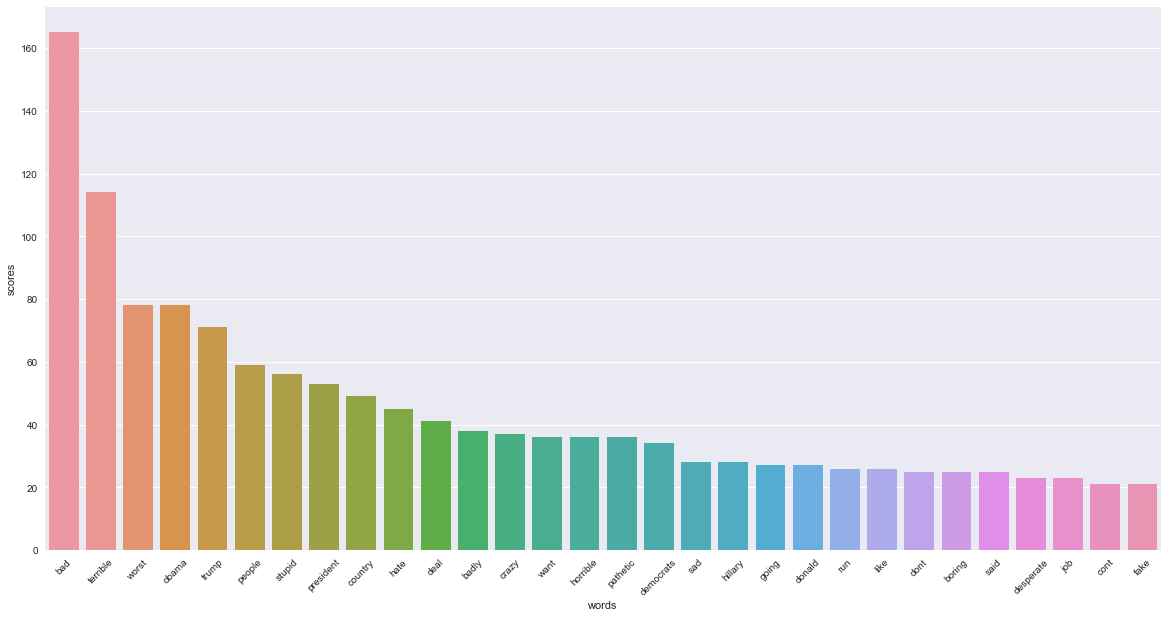

In [32]:
# Plot most common extreme negative words with seaborn
ex_neg_df = pd.DataFrame(most_common_ex_neg_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=ex_neg_df)
plt.xticks(rotation=45)
plt.show()

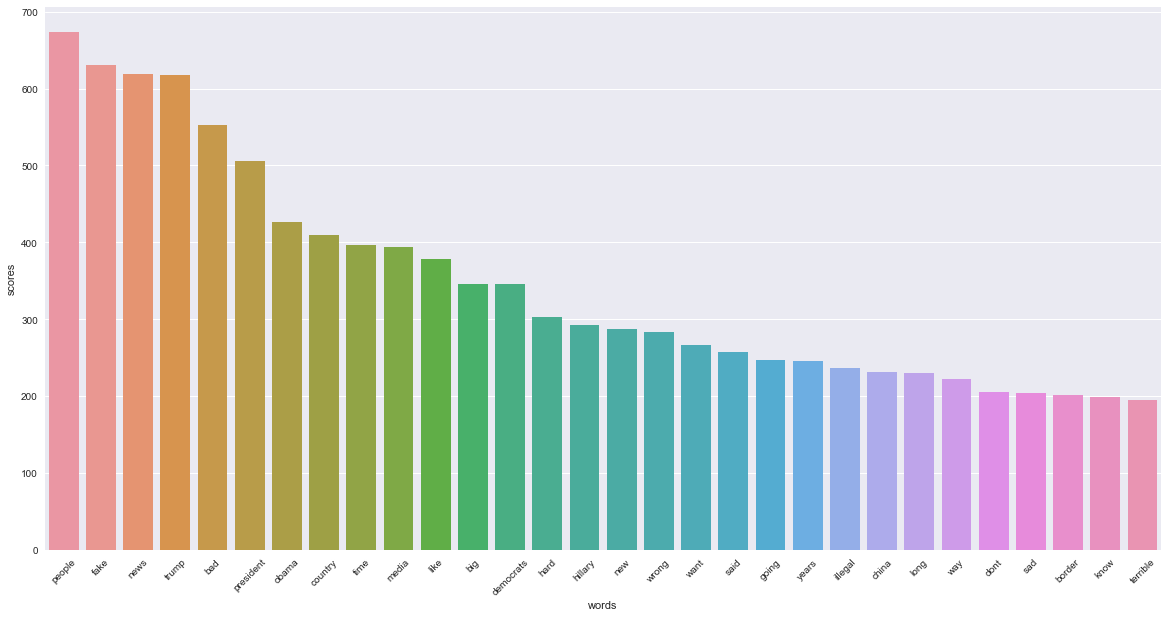

In [33]:
# Plot most common negative words with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

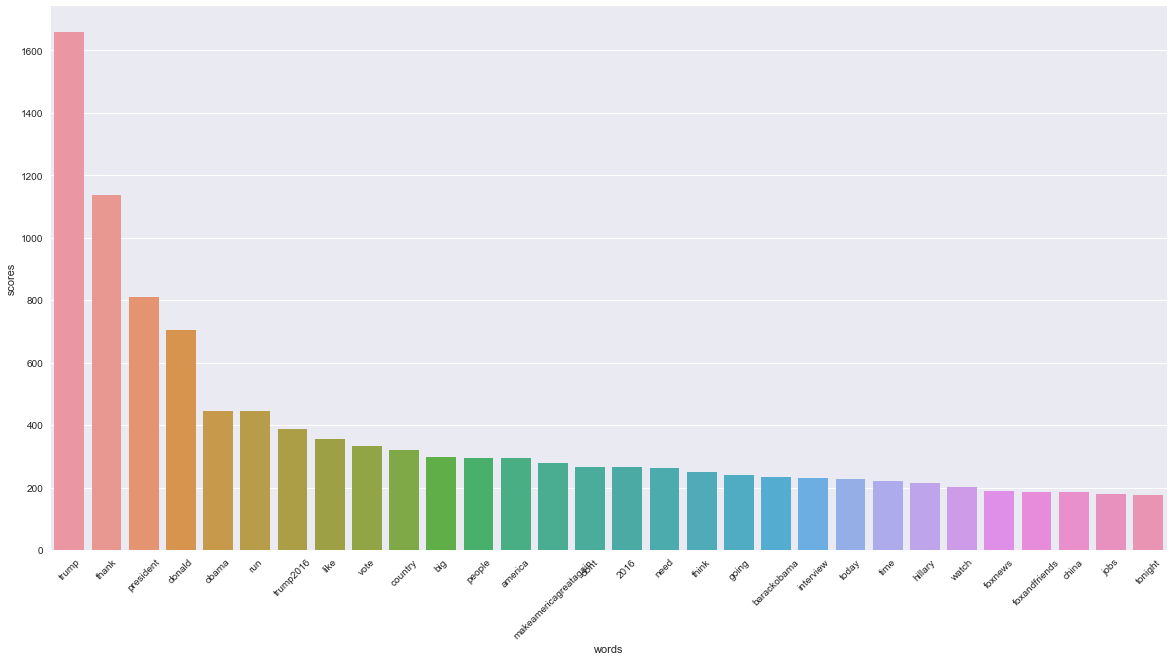

In [34]:
# Plot most common neutral words with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

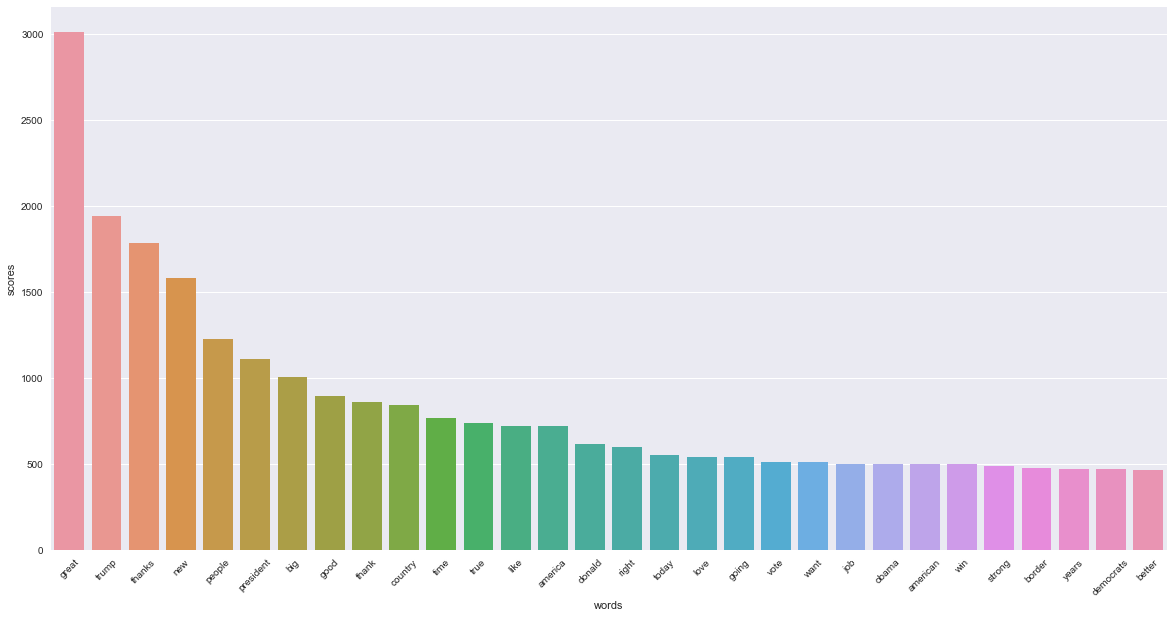

In [35]:
# Plot most common positive words with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

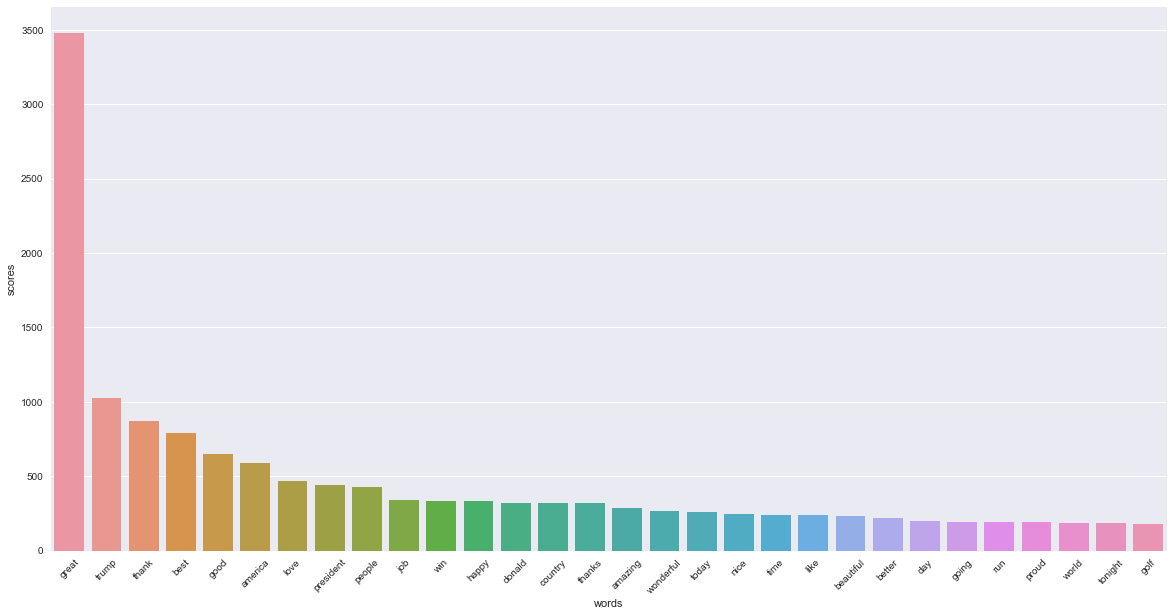

In [36]:
# Plot most common extreme positive words with seaborn
ex_pos_df = pd.DataFrame(most_common_ex_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=ex_pos_df)
plt.xticks(rotation=45)
plt.show()

In [37]:
# function for plotting wordcloud
def plot_wordcloud(docx):
    plt.figure(figsize=(10,8))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [38]:
ex_pos_docx = ' '.join(ep_tokens)
pos_docx = ' '.join(p_tokens)
neu_docx = ' '.join(nu_tokens)
neg_docx = ' '.join(n_tokens)
ex_neg_docx = ' '.join(en_tokens)


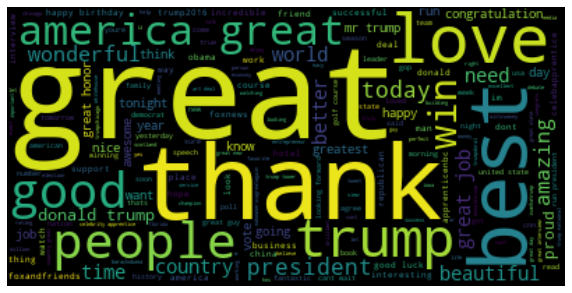

In [39]:
# Plotting word cloud of exteremly positive words
plot_wordcloud(ex_pos_docx)

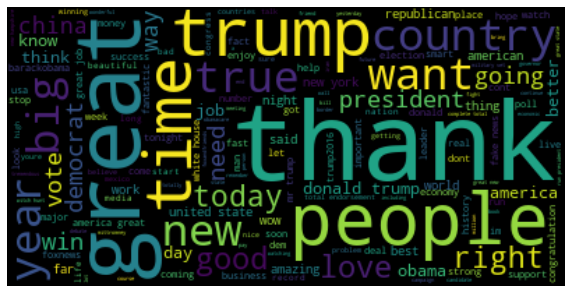

In [40]:
# Plotting word cloud of positive words 
plot_wordcloud(pos_docx)

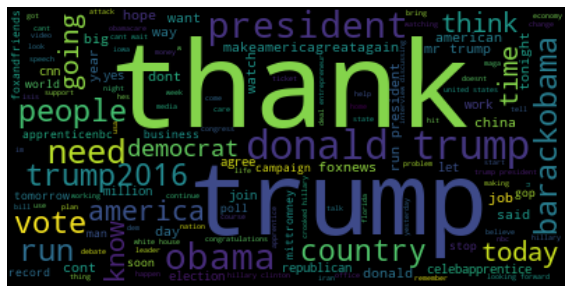

In [41]:
# Plotting word cloud of neutral words
plot_wordcloud(neu_docx)

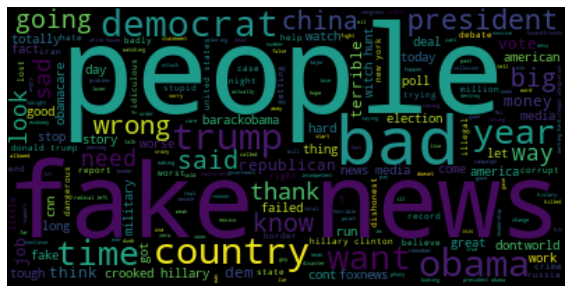

In [42]:
# Plotting word cloud of negative words
plot_wordcloud(neg_docx)

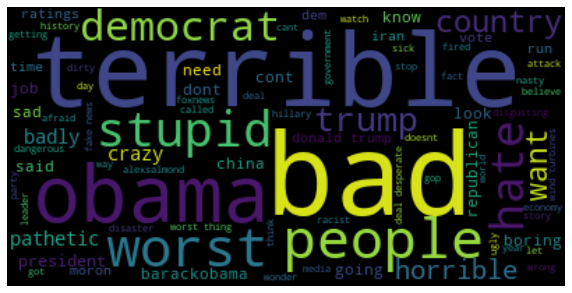

In [43]:
# Plotting word cloud of exteremly negative words
plot_wordcloud(ex_neg_docx)